In [3]:
### Inmuebles activos al 28 de Agosto del 2019
### Depuración de duplicados
import pandas as pd

activos=pd.read_csv('activos1.csv')
activos=activos.append(pd.read_csv('activos2.csv'))
activos=activos.append(pd.read_csv('activos3.csv'))
activos=activos.append(pd.read_csv('activos4.csv'))
activos.reset_index(inplace=True)
activos=activos.iloc[:,1:]
activos.shape

(296314, 17)

In [4]:
activos.head()

,Area_construida,Complemento_de_direccion,Direccion,Estrato,ID_inmueble,Numero_banos,Numero_de_fotos_360,Numero_de_fotos_planas,Numero_habitaciones,Numero_parqueaderos,Numero_total_fotos,Precio_venta,Tipo_inmueble,Tipo_transaccion,Unnamed: 16,Valor_administracion,canon_arrendamiento
0,287.0,CAJICA CONJ SPACIOS ZEN CA 31,KM 4 VIA ANTIGUA CHIA,4,30398,6,0,21,4.0,4,21,1300000000,Casa,Arriendo o venta,NaN,1000000.0,4500000
1,6490.0,NaN,NaN,1,30425,10,0,15,1.0,1,15,0,Lote,Arriendo,NaN,0.0,8000000
2,72.3,AP 408 ED PLATINIUM,CL 93 19 B 31,5,30474,2,0,20,2.0,2,20,598000000,Apartamento,Arriendo o venta,NaN,927630.0,2500000
3,10000.0,CONJ POLIGONOS INDUSTRIALES,CARTAGENA,0,30497,0,0,6,1.0,1,6,2000000000,Lote,Venta,NaN,0.0,0
4,348000.0,CONJ POLIGONOS INDUSTRIALES,CARTAGENA,0,30498,0,0,6,1.0,1,6,69600000000,Lote,Venta,NaN,0.0,0


## Depuración por criterios

In [3]:
activos['canon_arrendamiento']=pd.to_numeric(activos['canon_arrendamiento'],errors='coerce')
activos['Precio_venta']=pd.to_numeric(activos['Precio_venta'],errors='coerce')
activos.dtypes

Area_construida             float64
Complemento_de_direccion     object
Direccion                    object
Estrato                      object
ID_inmueble                   int64
Numero_banos                  int64
Numero_de_fotos_360           int64
Numero_de_fotos_planas        int64
Numero_habitaciones         float64
Numero_parqueaderos           int64
Numero_total_fotos            int64
Precio_venta                float64
Tipo_inmueble                object
Tipo_transaccion             object
Unnamed: 16                 float64
Valor_administracion        float64
canon_arrendamiento         float64
dtype: object

In [4]:
activos.describe()

,Area_construida,ID_inmueble,Numero_banos,Numero_de_fotos_360,Numero_de_fotos_planas,Numero_habitaciones,Numero_parqueaderos,Numero_total_fotos,Precio_venta,Unnamed: 16,Valor_administracion,canon_arrendamiento
count,2.960860e+05,2.963140e+05,296314.000000,296314.000000,296314.000000,296314.000000,296314.000000,296314.000000,2.963100e+05,4.000000,2.958380e+05,2.963130e+05
mean,1.359604e+05,9.523494e+05,3.379584,1.410409,11.220627,2.534598,2.124004,12.630834,1.301163e+09,2.250000,3.190552e+06,7.411094e+07
std,2.485565e+07,2.579801e+05,2.879245,3.534857,7.246035,2.068780,1.514664,5.972478,1.366411e+11,1.258306,5.627726e+08,2.599047e+10
min,-6.200000e+01,3.039800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000e+00,1.000000,0.000000e+00,-1.000000e+00
25%,6.700000e+01,7.753212e+05,2.000000,0.000000,5.000000,1.000000,1.000000,8.000000,0.000000e+00,1.750000,0.000000e+00,0.000000e+00
50%,1.030000e+02,1.021414e+06,2.000000,0.000000,11.000000,3.000000,2.000000,12.000000,2.200000e+08,2.000000,0.000000e+00,0.000000e+00
75%,2.050000e+02,1.162598e+06,4.000000,0.000000,18.000000,3.000000,3.000000,18.000000,5.190000e+08,2.500000,2.468000e+05,1.450000e+06
max,1.000000e+10,1.268677e+06,50.000000,48.000000,95.000000,485.000000,190.000000,95.000000,5.500000e+13,4.000000,2.170002e+11,1.000000e+13


### Apartamentos

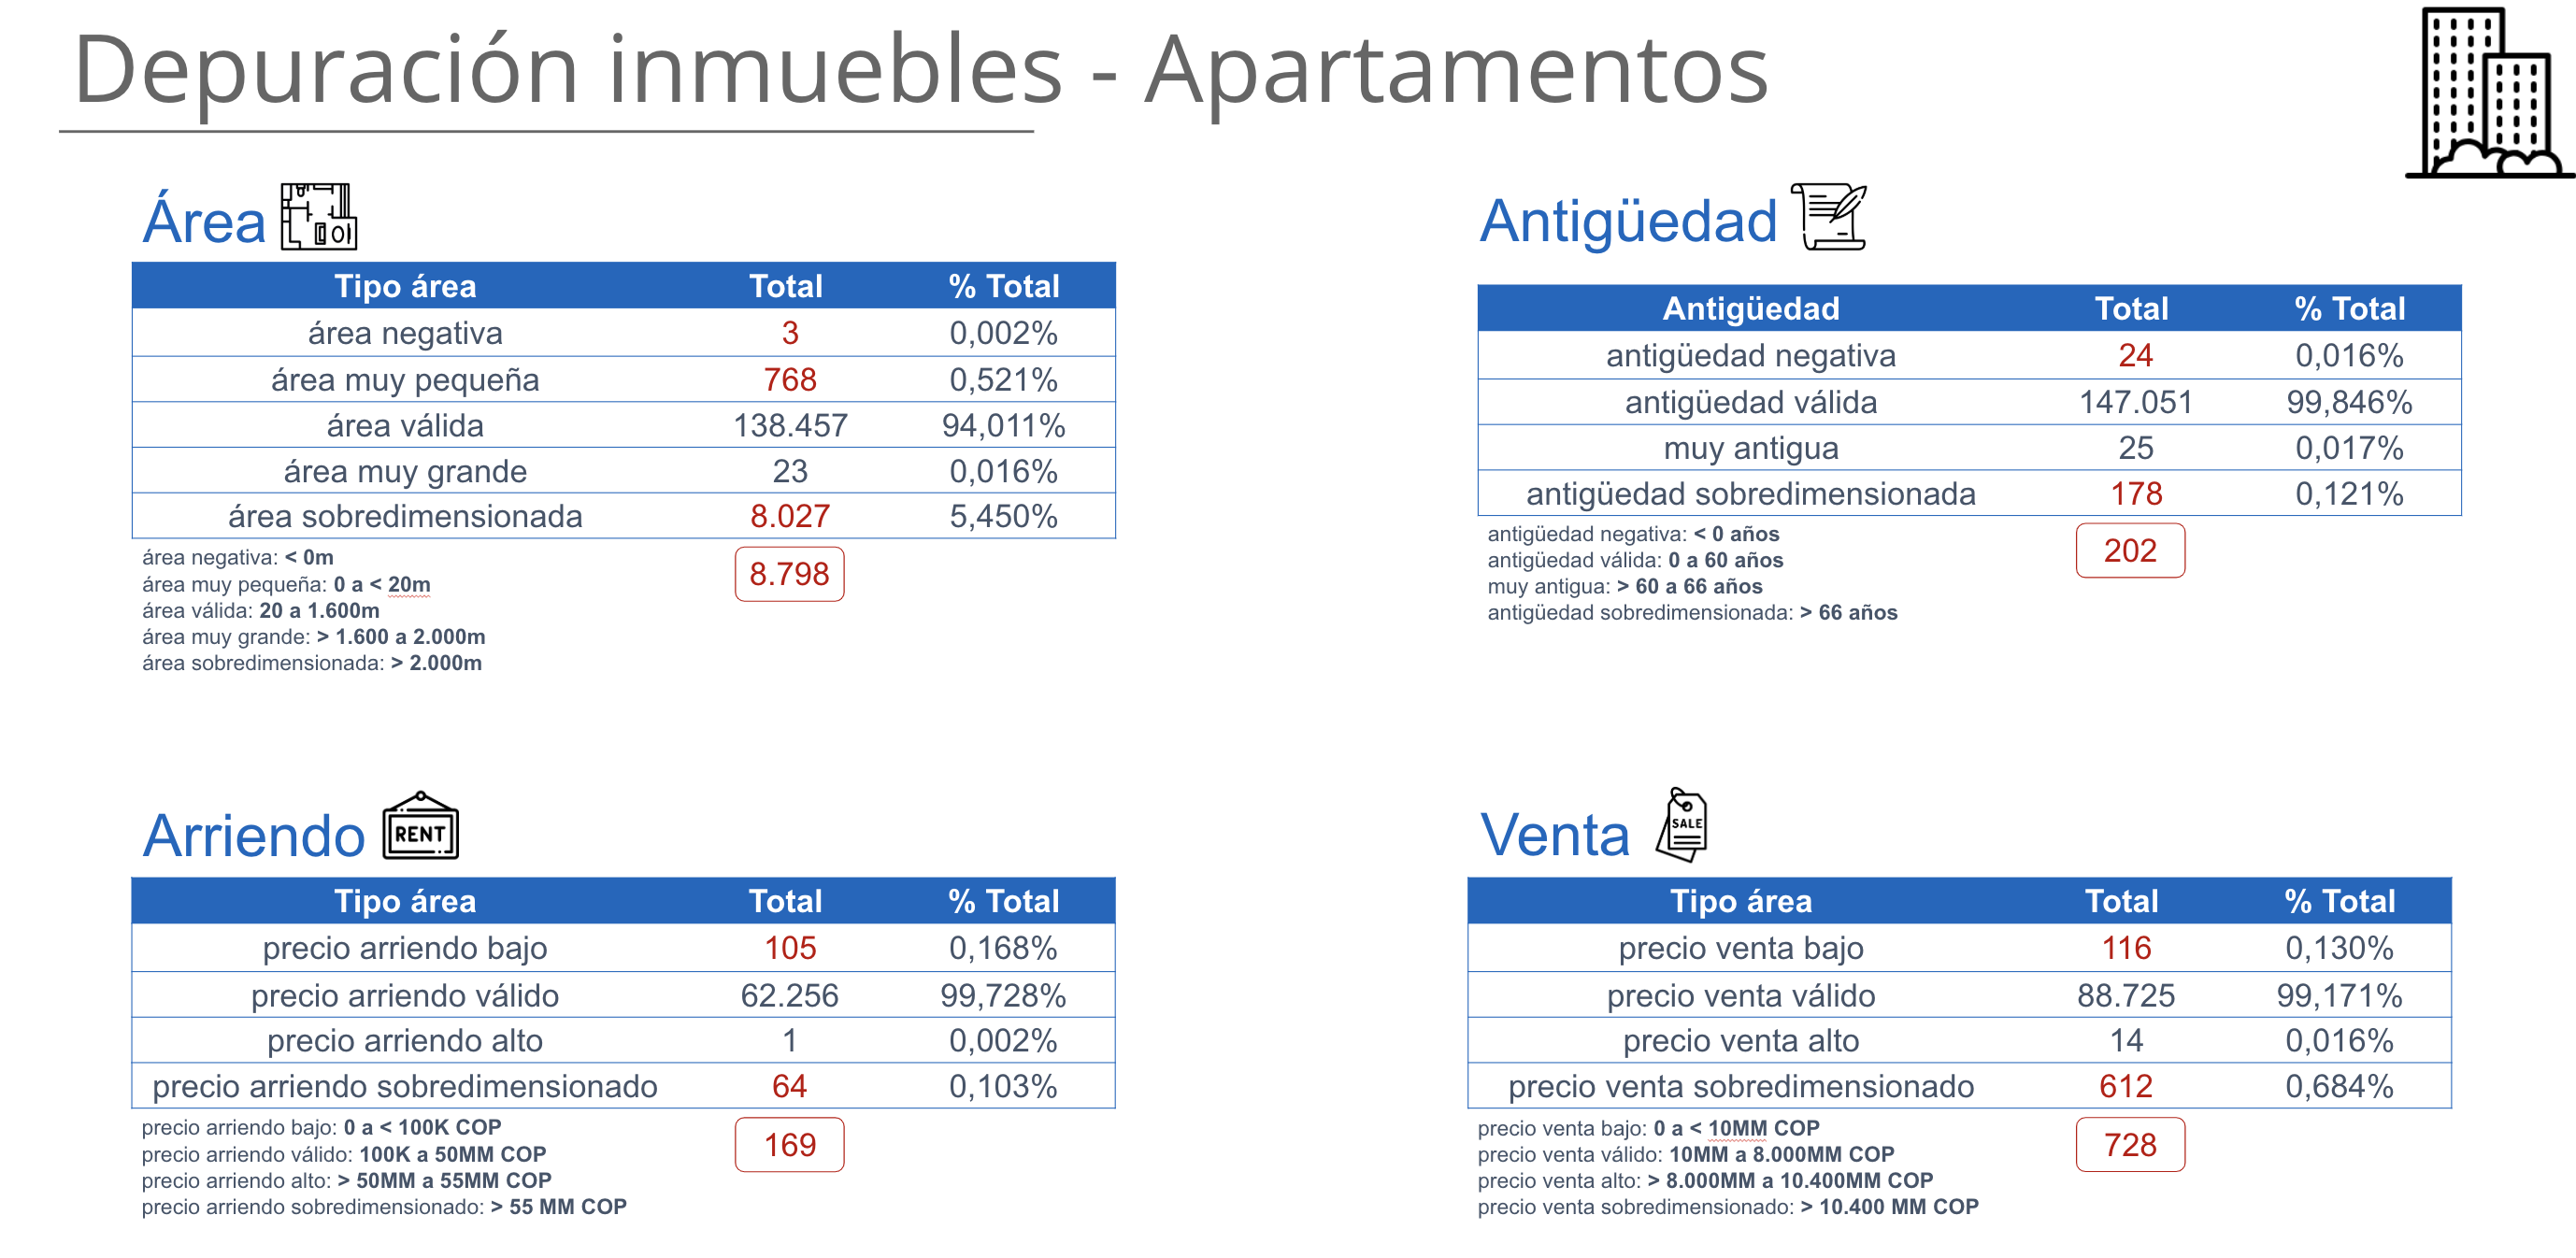

In [5]:
from PIL import Image
myImage = Image.open("/Users/andresgutierrez/Desktop/apartamentos.png");
myImage

#### Área

In [6]:
apto_area_no_aceptada=activos[(activos['Tipo_inmueble']=='Apartamento')&\
        ((activos['Area_construida']<=0)|\
        (activos['Area_construida']>1600))]

data_limpia=activos.drop(index=apto_area_no_aceptada.index,axis=0)
data_borrar=apto_area_no_aceptada

In [7]:
data_limpia['Area_construida'][activos['Tipo_inmueble']=='Apartamento'].describe()

count    156776.000000
mean        101.474964
std          69.173417
min           1.000000
25%          63.000000
50%          82.000000
75%         117.000000
max        1600.000000
Name: Area_construida, dtype: float64

In [8]:
print('porcentaje de inmuebles excluidos: '+"{0:.2%}".\
      format(apto_area_no_aceptada.shape[0]/activos.shape[0]))

print('Total inmuebles excluidos:'+str(apto_area_no_aceptada.shape[0]))

porcentaje de inmuebles excluidos: 0.16%
Total inmuebles excluidos:473


#### Antiguedad

No está el campo 'Antiguedad' en el dataset

#### Canon Arriendo

In [9]:
apto_canon_arriendo_no_aceptado=data_limpia\
        [(data_limpia['Tipo_inmueble']=='Apartamento')&\
        (data_limpia['Tipo_transaccion']=='Arriendo')&\
        ((data_limpia['canon_arrendamiento']<100000)|\
        (data_limpia['canon_arrendamiento']>50000000))]

data_limpia=data_limpia.drop(index=apto_canon_arriendo_no_aceptado.index,axis=0)
data_borrar=data_borrar.append(apto_canon_arriendo_no_aceptado)

In [10]:
data_limpia['canon_arrendamiento'][(data_limpia['Tipo_inmueble']=='Apartamento')&\
                                  (data_limpia['Tipo_transaccion']=='Arriendo')].describe()

count    5.518900e+04
mean     1.944973e+06
std      1.955842e+06
min      1.300000e+05
25%      9.500000e+05
50%      1.376000e+06
75%      2.200000e+06
max      4.500000e+07
Name: canon_arrendamiento, dtype: float64

In [11]:
print('porcentaje de inmuebles excluidos: '+"{0:.2%}".\
      format(apto_canon_arriendo_no_aceptado.shape[0]/activos.shape[0]))

print('Total inmuebles excluidos:'+str(apto_canon_arriendo_no_aceptado.shape[0]))

porcentaje de inmuebles excluidos: 0.02%
Total inmuebles excluidos:46


#### Precio Venta

In [12]:
apto_precio_de_venta_no_aceptado=data_limpia\
        [(data_limpia['Tipo_inmueble']=='Apartamento')&\
        (data_limpia['Tipo_transaccion']=='Venta')&\
        ((data_limpia['Precio_venta']<10000000)|\
        (data_limpia['Precio_venta']>8000000000))]

data_limpia=data_limpia.drop(index=apto_precio_de_venta_no_aceptado.index,axis=0)
data_borrar=data_borrar.append(apto_precio_de_venta_no_aceptado)

In [13]:
data_limpia['Precio_venta'][(data_limpia['Tipo_inmueble']=='Apartamento')&\
                                  (data_limpia['Tipo_transaccion']=='Venta')].describe()

count    9.619000e+04
mean     4.708029e+08
std      4.919306e+08
min      1.200000e+07
25%      2.100000e+08
50%      3.220000e+08
75%      5.500000e+08
max      8.000000e+09
Name: Precio_venta, dtype: float64

In [14]:
print('porcentaje de inmuebles excluidos: '+"{0:.2%}".\
      format(apto_precio_de_venta_no_aceptado.shape[0]/activos.shape[0]))

print('Total inmuebles excluidos:'+str(apto_precio_de_venta_no_aceptado.shape[0]))

porcentaje de inmuebles excluidos: 0.01%
Total inmuebles excluidos:33


### Casas

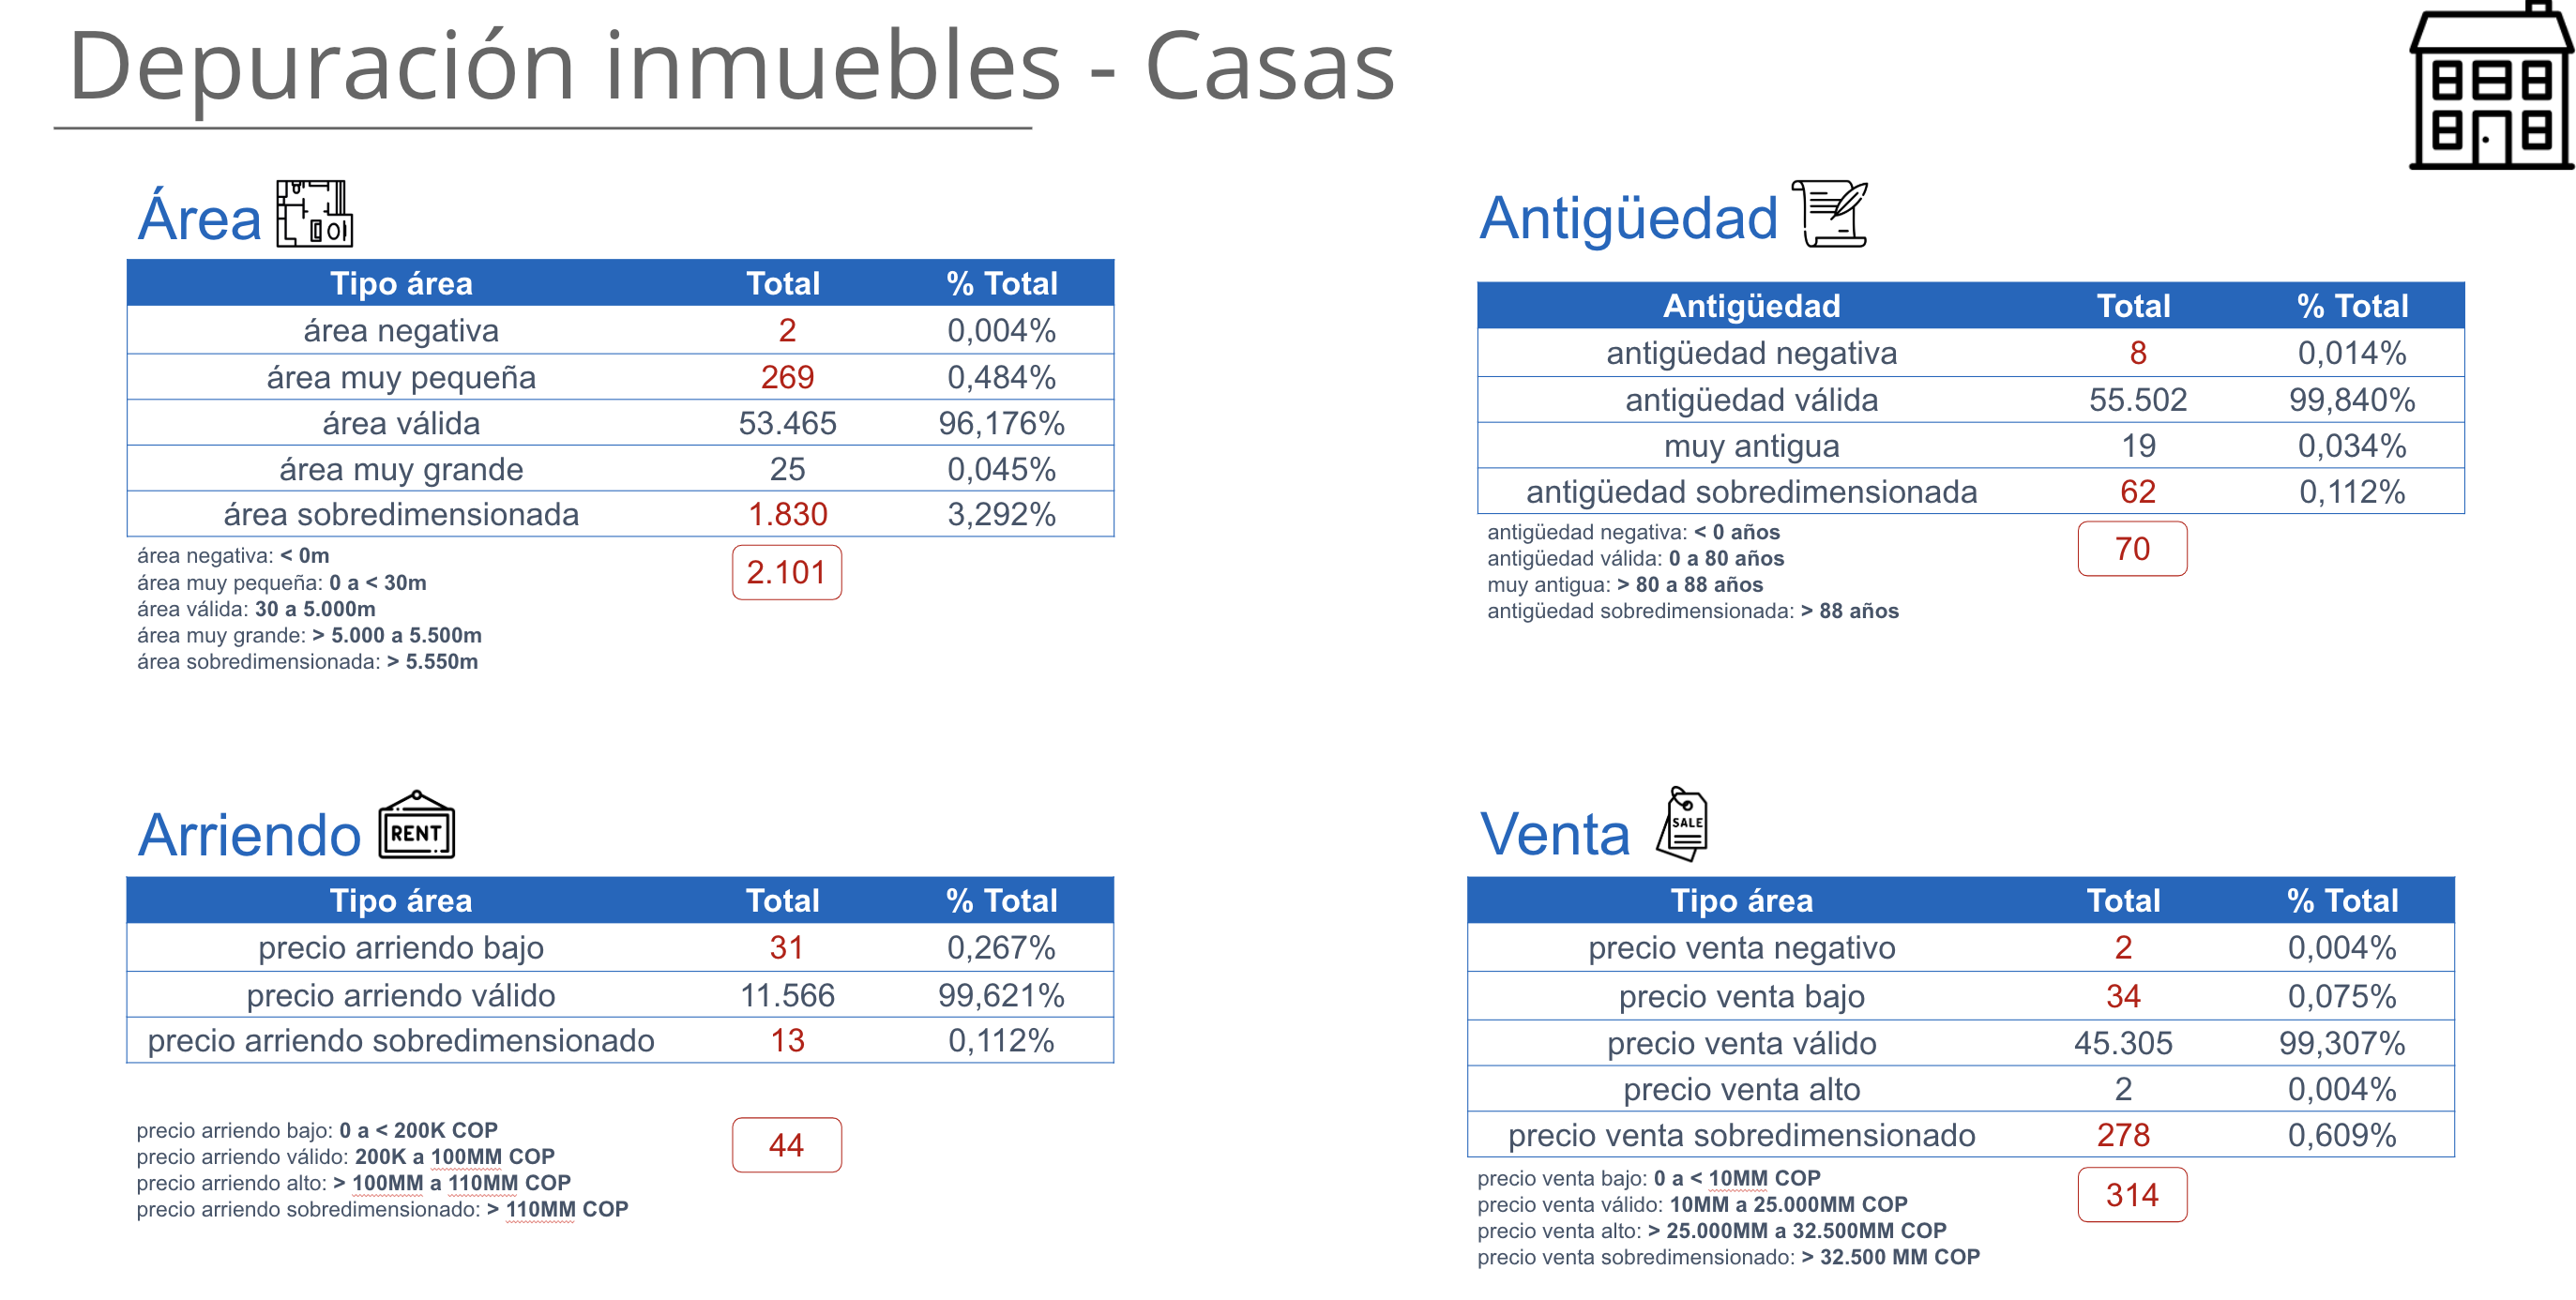

In [15]:
myImage = Image.open("/Users/andresgutierrez/Desktop/casas.png");
myImage

#### Área

In [16]:
casa_area_no_aceptada=data_limpia[(data_limpia['Tipo_inmueble']=='Casa')&\
        ((data_limpia['Area_construida']<30)|\
        (data_limpia['Area_construida']>5000))]

data_limpia=data_limpia.drop(index=casa_area_no_aceptada.index,axis=0)
data_borrar=data_borrar.append(casa_area_no_aceptada)

In [17]:
data_limpia['Area_construida'][activos['Tipo_inmueble']=='Casa'].describe()

count    60825.000000
mean       245.298149
std        256.772263
min         30.000000
25%        117.000000
50%        180.000000
75%        296.000000
max       5000.000000
Name: Area_construida, dtype: float64

In [18]:
print('porcentaje de inmuebles excluidos: '+"{0:.2%}".\
      format(casa_area_no_aceptada.shape[0]/activos.shape[0]))

print('Total inmuebles excluidos:'+str(casa_area_no_aceptada.shape[0]))

porcentaje de inmuebles excluidos: 0.09%
Total inmuebles excluidos:260


#### Antiguedad

No está el campo 'Antiguedad' en el dataset

#### Canon arriendo

In [19]:
casa_canon_arriendo_no_aceptado=data_limpia\
        [(data_limpia['Tipo_inmueble']=='Casa')&\
        (data_limpia['Tipo_transaccion']=='Arriendo')&\
        ((data_limpia['canon_arrendamiento']<200000)|\
        (data_limpia['canon_arrendamiento']>10000000))]

data_limpia=data_limpia.drop(index=casa_canon_arriendo_no_aceptado.index,axis=0)
data_borrar=data_borrar.append(casa_canon_arriendo_no_aceptado)

In [20]:
data_limpia['canon_arrendamiento'][(data_limpia['Tipo_inmueble']=='Casa')&\
                                  (data_limpia['Tipo_transaccion']=='Arriendo')].describe()

count    9.375000e+03
mean     3.020954e+06
std      2.298143e+06
min      2.200000e+05
25%      1.200000e+06
50%      2.300000e+06
75%      4.215000e+06
max      1.000000e+07
Name: canon_arrendamiento, dtype: float64

In [21]:
print('porcentaje de inmuebles excluidos: '+"{0:.2%}".\
      format(casa_canon_arriendo_no_aceptado.shape[0]/activos.shape[0]))

print('Total inmuebles excluidos:'+str(casa_canon_arriendo_no_aceptado.shape[0]))

porcentaje de inmuebles excluidos: 0.21%
Total inmuebles excluidos:625


#### Precio venta

In [22]:
casa_precio_de_venta_no_aceptado=data_limpia\
        [(data_limpia['Tipo_inmueble']=='Casa')&\
        (data_limpia['Tipo_transaccion']=='Venta')&\
        ((data_limpia['Precio_venta']<10000000)|\
        (data_limpia['Precio_venta']>25000000000))]

data_limpia=data_limpia.drop(index=casa_precio_de_venta_no_aceptado.index,axis=0)
data_borrar=data_borrar.append(casa_precio_de_venta_no_aceptado)

In [23]:
data_limpia['Precio_venta'][(data_limpia['Tipo_inmueble']=='Casa')&\
                                  (data_limpia['Tipo_transaccion']=='Arriendo')].describe()

count    9.375000e+03
mean     7.730512e+06
std      9.240515e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.800000e+09
Name: Precio_venta, dtype: float64

In [24]:
print('porcentaje de inmuebles excluidos: '+"{0:.2%}".\
      format(casa_precio_de_venta_no_aceptado.shape[0]/activos.shape[0]))

print('Total inmuebles excluidos:'+str(casa_precio_de_venta_no_aceptado.shape[0]))

porcentaje de inmuebles excluidos: 0.01%
Total inmuebles excluidos:19


### Dataset Limpio

In [25]:
data_limpia.shape

(294858, 17)

In [26]:
data_limpia.describe()

,Area_construida,ID_inmueble,Numero_banos,Numero_de_fotos_360,Numero_de_fotos_planas,Numero_habitaciones,Numero_parqueaderos,Numero_total_fotos,Precio_venta,Unnamed: 16,Valor_administracion,canon_arrendamiento
count,2.946340e+05,2.948580e+05,294858.000000,294858.000000,294858.000000,294858.000000,294858.000000,294858.000000,2.948540e+05,4.000000,2.943850e+05,2.948570e+05
mean,1.338507e+05,9.519619e+05,3.377005,1.409234,11.219621,2.531513,2.122530,12.628652,1.243044e+09,2.250000,3.136830e+06,7.424957e+07
std,2.489554e+07,2.580576e+05,2.878358,3.531147,7.244921,2.066902,1.511202,5.971460,1.365806e+11,1.258306,5.631758e+08,2.605455e+10
min,-3.500000e+01,3.039800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000e+00,1.000000,0.000000e+00,-1.000000e+00
25%,6.700000e+01,7.748782e+05,2.000000,0.000000,5.000000,1.000000,1.000000,8.000000,0.000000e+00,1.750000,0.000000e+00,0.000000e+00
50%,1.030000e+02,1.020850e+06,2.000000,0.000000,11.000000,3.000000,2.000000,12.000000,2.200000e+08,2.000000,0.000000e+00,0.000000e+00
75%,2.020000e+02,1.162451e+06,4.000000,0.000000,18.000000,3.000000,3.000000,18.000000,5.200000e+08,2.500000,2.480000e+05,1.400000e+06
max,1.000000e+10,1.268677e+06,50.000000,48.000000,95.000000,485.000000,190.000000,95.000000,5.500000e+13,4.000000,2.170002e+11,1.000000e+13


In [27]:
data_limpia.head()

,Area_construida,Complemento_de_direccion,Direccion,Estrato,ID_inmueble,Numero_banos,Numero_de_fotos_360,Numero_de_fotos_planas,Numero_habitaciones,Numero_parqueaderos,Numero_total_fotos,Precio_venta,Tipo_inmueble,Tipo_transaccion,Unnamed: 16,Valor_administracion,canon_arrendamiento
0,287.0,CAJICA CONJ SPACIOS ZEN CA 31,KM 4 VIA ANTIGUA CHIA,4,30398,6,0,21,4.0,4,21,1.300000e+09,Casa,Arriendo o venta,NaN,1000000.0,4500000.0
1,6490.0,NaN,NaN,1,30425,10,0,15,1.0,1,15,0.000000e+00,Lote,Arriendo,NaN,0.0,8000000.0
2,72.3,AP 408 ED PLATINIUM,CL 93 19 B 31,5,30474,2,0,20,2.0,2,20,5.980000e+08,Apartamento,Arriendo o venta,NaN,927630.0,2500000.0
3,10000.0,CONJ POLIGONOS INDUSTRIALES,CARTAGENA,0,30497,0,0,6,1.0,1,6,2.000000e+09,Lote,Venta,NaN,0.0,0.0
4,348000.0,CONJ POLIGONOS INDUSTRIALES,CARTAGENA,0,30498,0,0,6,1.0,1,6,6.960000e+10,Lote,Venta,NaN,0.0,0.0


### Dataset de inmuebles a borrar

In [28]:
data_borrar.shape

(1456, 17)

In [29]:
data_borrar.describe()

,Area_construida,ID_inmueble,Numero_banos,Numero_de_fotos_360,Numero_de_fotos_planas,Numero_habitaciones,Numero_parqueaderos,Numero_total_fotos,Precio_venta,Unnamed: 16,Valor_administracion,canon_arrendamiento
count,1.452000e+03,1.456000e+03,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1.456000e+03,0.0,1.453000e+03,1.456000e+03
mean,5.640540e+05,1.030825e+06,3.901786,1.648352,11.424451,3.159341,2.422390,13.072802,1.307097e+10,NaN,1.407479e+07,4.603659e+07
std,1.466765e+07,2.286880e+05,3.009373,4.214193,7.468039,2.337654,2.080713,6.161530,1.479590e+11,NaN,4.740968e+08,4.431087e+08
min,-6.200000e+01,5.977000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,6.000000e+00,9.394192e+05,2.000000,0.000000,4.000000,2.000000,1.000000,8.000000,0.000000e+00,NaN,0.000000e+00,0.000000e+00
50%,4.490000e+02,1.118628e+06,4.000000,0.000000,12.000000,3.000000,2.000000,13.000000,0.000000e+00,NaN,0.000000e+00,1.900000e+06
75%,1.153500e+03,1.183042e+06,7.000000,0.000000,20.000000,5.000000,4.000000,20.000000,1.812500e+08,NaN,0.000000e+00,1.500000e+07
max,4.100000e+08,1.268570e+06,19.000000,21.000000,26.000000,23.000000,14.000000,26.000000,3.509000e+12,NaN,1.800000e+10,1.200000e+10


In [30]:
data_borrar.head()

,Area_construida,Complemento_de_direccion,Direccion,Estrato,ID_inmueble,Numero_banos,Numero_de_fotos_360,Numero_de_fotos_planas,Numero_habitaciones,Numero_parqueaderos,Numero_total_fotos,Precio_venta,Tipo_inmueble,Tipo_transaccion,Unnamed: 16,Valor_administracion,canon_arrendamiento
2080,8888.0,NaN,NaN,3,128860,2,0,11,3.0,3,11,440000000.0,Apartamento,Venta,NaN,460000.0,0.0
5624,5424.0,NaN,CL 56,NaN,275332,6,0,19,4.0,2,19,731000000.0,Apartamento,Venta,NaN,1050000.0,0.0
9032,5400.0,NaN,NaN,4,389782,0,0,9,1.0,1,9,0.0,Apartamento,Arriendo,NaN,0.0,1400000.0
9832,6870.0,AP 1407,CL 45 A SUR 59 226,3,408746,2,0,15,3.0,1,15,260000000.0,Apartamento,Venta,NaN,0.0,0.0
10492,2500.0,NaN,NaN,3,422114,4,0,9,3.0,1,9,650000000.0,Apartamento,Venta,NaN,180000.0,0.0
